## Task: Exploration and Regression

First we import the necessary packages and modules for our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
%matplotlib inline

c:\users\jimmy\anaconda2\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Next, we load the given dataset and we convert in a dataframe to have an overview of the data and check some interesting properties

In [2]:
input_data=pd.read_pickle("data.pkl")
X=input_data['x']
y=input_data['y']
labels=[]
for i in range(0,X.shape[1]):
    labels.append("Feature "+str(i+1))
labels.append("Output")
input_dataframe = pd.DataFrame(np.concatenate((X,y),axis=1),columns=labels)
input_dataframe.head(n=10)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Output
0,0.115055,0.609067,0.133391,0.240590,0.327139,1.001046
1,0.859137,0.666090,0.541162,0.029014,0.733748,0.830652
2,0.394950,0.802047,0.254421,0.056885,0.866649,1.490916
3,0.221029,0.404989,0.316096,0.076663,0.843225,1.596182
4,0.848939,0.971465,0.385377,0.954488,0.445758,-0.022635
5,0.669725,0.082500,0.897099,0.298004,0.262305,1.616383
6,0.005130,0.543203,0.475596,0.636374,0.978204,1.815683
7,0.908663,0.910153,0.525256,0.104019,0.180915,0.518382
8,0.953040,0.411953,0.865017,0.672177,0.628786,0.783787
9,0.275559,0.896747,0.206891,0.404405,0.993572,1.511226


In [3]:
input_dataframe.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Output
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499933,0.505453,0.504189,0.506779,0.498365,1.024238
std,0.288940,0.287794,0.286472,0.288671,0.286517,0.593831
min,0.000164,0.000072,0.000164,0.000021,0.000025,-1.519280
25%,0.249170,0.262026,0.263104,0.259393,0.252012,0.650326
50%,0.495318,0.506856,0.499379,0.503578,0.504760,1.047760
75%,0.753288,0.752344,0.754176,0.758440,0.743058,1.448197
max,0.999596,0.999991,0.999940,0.999624,0.999931,2.630286


From the data above, we observe that the feature data seem to be similarly distributed with a mean around 0.5 and std close to 0.3

Skewness and Kurtosis of the data (last element corresponds to output).

In [4]:
print('Skewness:\n{}'.format(skew(input_dataframe))) 
print('Kurtosis:\n{}'.format(kurtosis(input_dataframe))) 

Skewness:
[-0.00456947 -0.02365972  0.00116432 -0.00326436 -0.01001854 -0.44534698]
Kurtosis:
[-1.2011129  -1.16975562 -1.16907603 -1.19933697 -1.17710304  0.35985735]


From these Skewness resutls, we can see that the data seem to be symmetric around the mean. Kurtosis values show that features have a considerable quantity of data in the tails. On the other side, in kurtosis output is small and positive Overall, we can state that the combination of these values imply uniform distribution for our features. In the next part, we plot our data to see if our assumption is true.

### Data Visualization

As a first step, we are interested in visualzing the input data and obtain an overview of their distribution. For this purpose, we present the scatter plot, histrogram and kernel density function of each feature below.

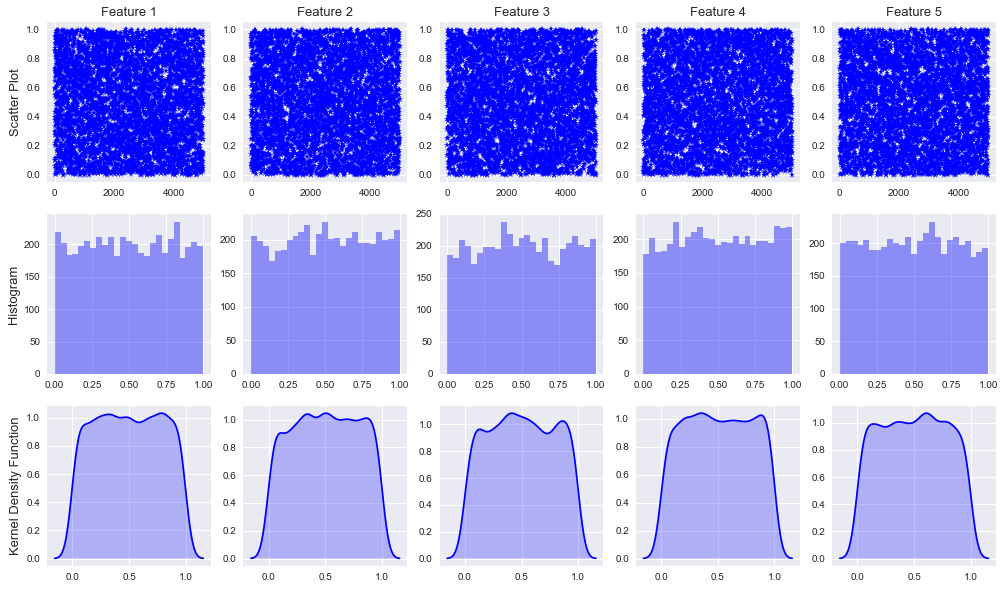

In [4]:
fig, ax = plt.subplots(3,5, figsize=(17,10))
for i in range(0,X.shape[1]):
    ax[0,i].plot(X[:,i],'b*',)
    sns.distplot(X[:,i],ax=ax[1,i], hist=True, kde=False,color="b",bins=25)
    sns.distplot(X[:,i],ax=ax[2,i], hist=False, color="b", kde_kws={"shade": True})
    ax[0,i].set_title('Feature {}'.format(i+1),fontsize=13) # Subplot titles
    ax[0,0].set_ylabel('Scatter Plot',fontsize=13) 
    ax[1,0].set_ylabel('Histogram',fontsize=13) 
    ax[2,0].set_ylabel('Kernel Density Function',fontsize=13)
plt.show()

From the plots above, we can state that all features seem to be uniformlly distributed between 0 and 1.

We follow the same procedure for the output data.

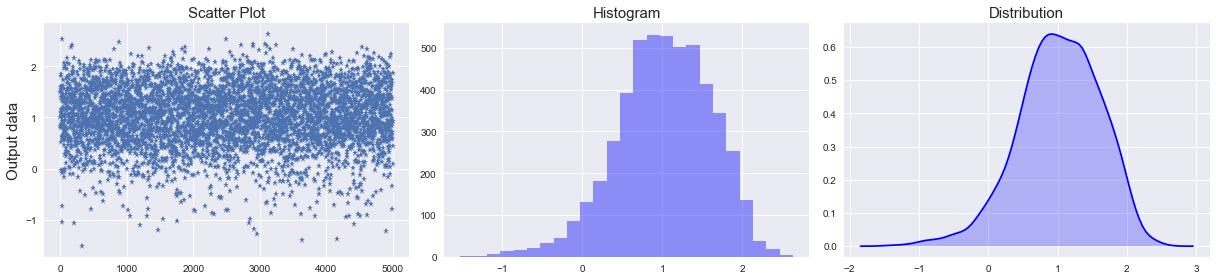

In [5]:
fig, ax = plt.subplots(1,3, figsize=(17,4))
ax[0].plot(y,'*')
sns.distplot(y,ax=ax[1], kde=False, hist=True, color="b",bins=25)
sns.distplot(y,ax=ax[2], hist=False, color="b", kde_kws={"shade": True})
ax[0].set_ylabel('Output data',fontsize=15) # ylabel for left-most subplot
ax[0].set_title('Scatter Plot',fontsize=15) # ylabel for left-most subplot
ax[1].set_title('Histogram',fontsize=15) # ylabel for left-most subplot
ax[2].set_title('Distribution',fontsize=15) # ylabel for left-most subplot
fig.tight_layout()

### Correlations

As a next step, we focus on explore the correlations between different features

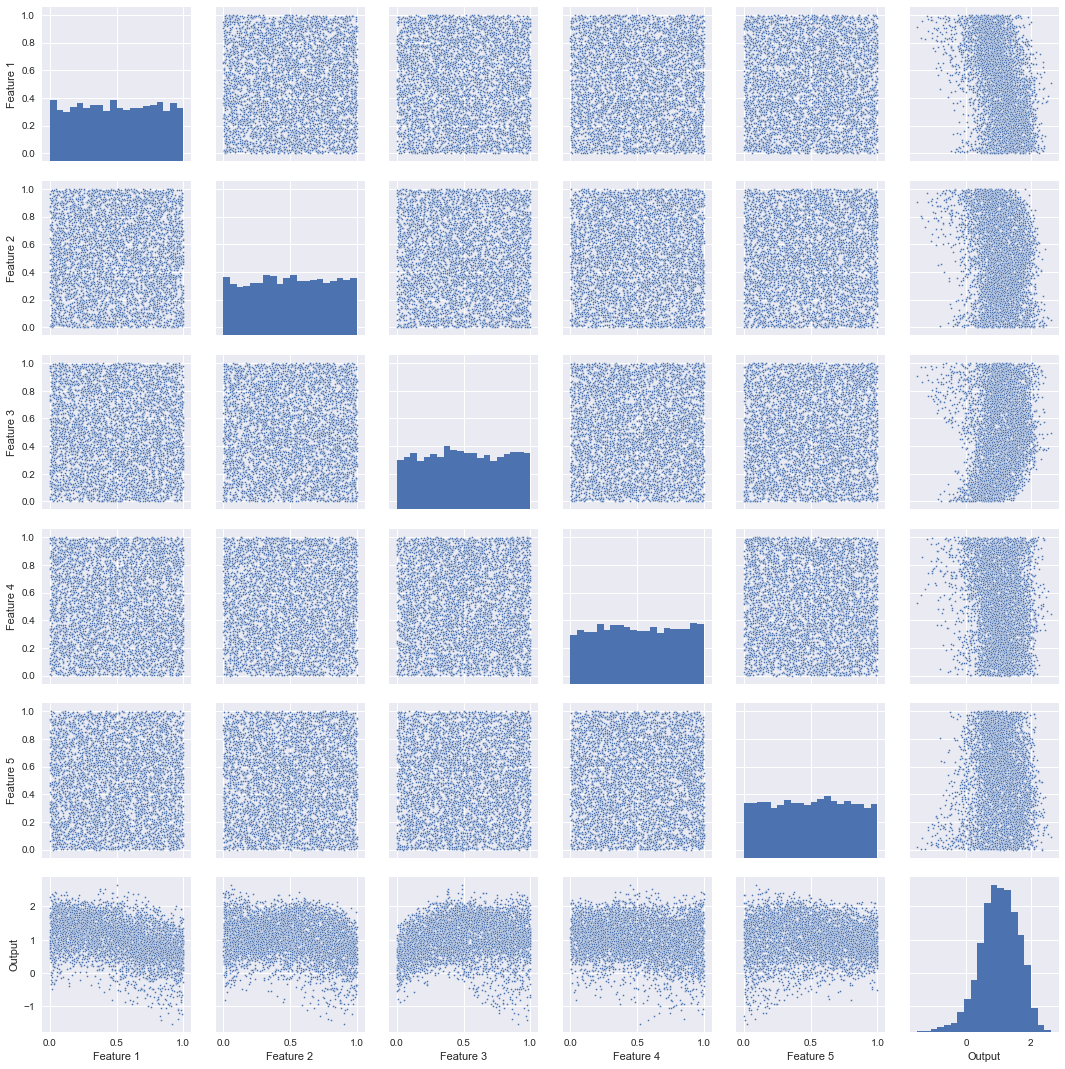

In [7]:
g = sns.pairplot(input_dataframe, plot_kws={'s' : 4}, diag_kws={'bins' : 20})

It is interesting to notice that the data are not correlated at all. Their distribution are uniform between 0 and 1 and look quite similar. Each of them appear to have similar correlation with the output.

### PCA for visualization

Now, we go ahead with Principal Component Analysis in order to be able to visualize our data in the 2d and 3d space. For this reason, we obtain the scores of the first and second principal component directions.

In [6]:
pca = PCA(n_components=2)
X_2D=pca.fit(X).transform(X)
X_1D=X_2D[:,0]

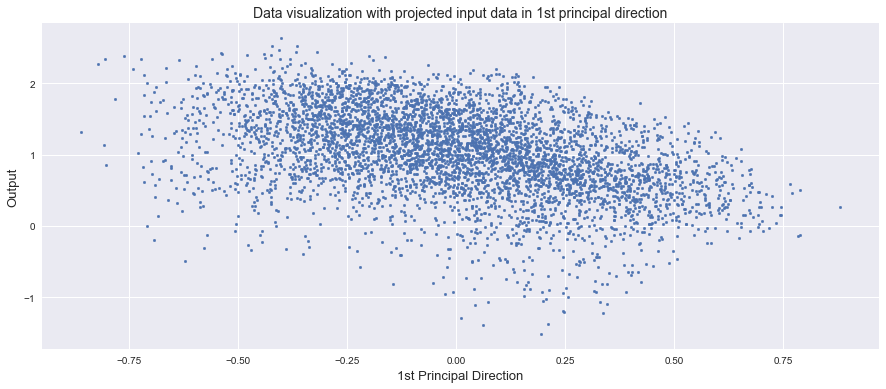

In [7]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.scatter(X_1D,y,s=7)
ax.set_ylabel("Οutput",fontsize=13)
ax.set_xlabel("1st Principal Direction",fontsize=13)
plt.title("Data visualization with projected input data in 1st principal direction",fontsize=14)
plt.show()

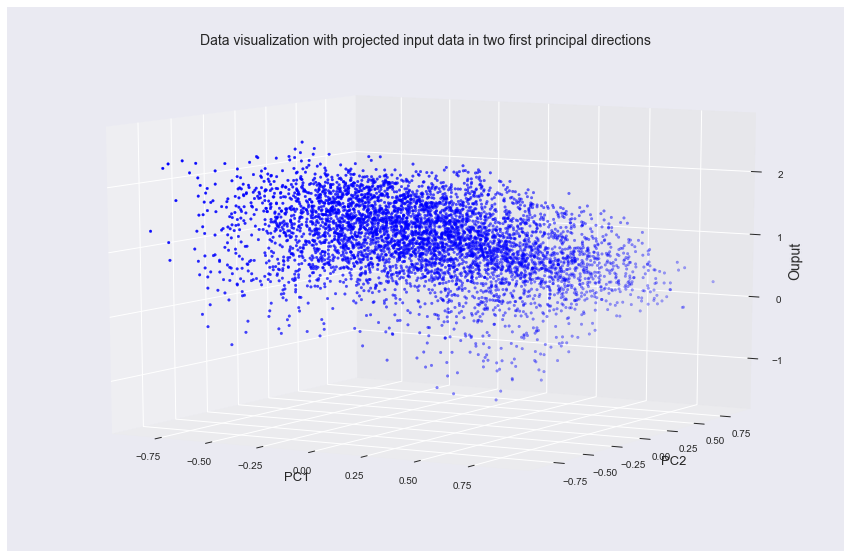

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_2D[:,0], X_2D[:,0], y, 
           c='b', s=7, marker='o', label='original')
ax.set_xlabel('PC1',fontsize=13)
ax.set_ylabel('PC2',fontsize=13)
ax.set_zlabel('Ouput',fontsize=14)
ax.elev = 10 # Elevation
plt.title("Data visualization with projected input data in two first principal directions",fontsize=14)
plt.show()

It is interesting to note that the input data do not seem to follow a linear trend over output. That means that a simple linear regression model should not be able to make good enough predictions. Yet, we will use as a baseline model and apply more complicated ones to get better results. 

### Data Preparation

Since, we do not have any missing data, we will now proceed with splitting our data in training and test set in order to built in order to built and assess regression models.

In [10]:
XTrain, XTest, yTrain, yTest = train_test_split(X,y, random_state=10, test_size=0.2)
yTrain = yTrain[:,0] # Fix problem with predictors below
yTest= yTest[:,0] # Fix problem with predictors below
print("Training set: {} examples and {} features".format(XTrain.shape[0], XTrain.shape[1]))
print("Test set: {} examples and {} features".format(XTest.shape[0], XTest.shape[1]))

Training set: 4000 examples and 5 features
Test set: 1000 examples and 5 features


### Build Models

We will build several regression models for this task. We will start with linear regression as a baseline. As we saw before, the form of data shows that a linear model should not be sufficient for good predictions. For this reason, we plan to use Decision Trees, as well as Random Forests, which can capture non-linearities by dividing the space into smaller sub-spaces. Finally, we will train a Support Vector Regressor model with an rbf kernel, which could model better more complicated non-linear functions.

In order to choose the hyperparameters (if needed) for each model, we will apply a Grid Search over these parameters using with a 5-fold cross validation. We will set the mean square error (mse) as an evaluation metric. 

In [11]:
Models=OrderedDict() # Dictionary for storing different regression models
folds=5

##### Linear Regression: The baseline 

In our baseline model, we do not use a 5-fold cross validation model, since we do not have to choose a hyperparameter.

In [12]:
LR_simple=linear_model.LinearRegression()
LR_simple.fit(XTrain,yTrain)
Models["Linear Regression"]=LR_simple

##### Linear Regression with regularization (Lasso)

This model is the same as before, with only difference that we are using regularization to avoid overfitting.
We will try to find the best combination for the L2 regularization and maximum number of iterations (the number of iterations until convergence).

In [13]:
alpha_range=[1,0.1,0.01,10e-3,10e-4,10e-5,10e-6]
max_iter_range=[500,1000,2000]
parameters   = [{'max_iter': max_iter_range,'alpha': alpha_range}]
gridCV = GridSearchCV(estimator=linear_model.Lasso(), param_grid=parameters, cv=folds, scoring='neg_mean_squared_error')
gridCV.fit(XTrain, yTrain)
best_l2 = gridCV.best_params_['alpha']
best_max_iter = gridCV.best_params_['max_iter']
print ('Best parameters for Lasso Linear Regression: l2 regularization=', best_l2,'and number of maximum iterations=', best_max_iter)

# Model training
LR_lasso=linear_model.Lasso(alpha =best_l2,max_iter=best_max_iter)
LR_lasso.fit(XTrain,yTrain)
Models["Lasso Linear Regression"]=LR_lasso

Best parameters for Lasso Linear Regression: l2 regularization= 0.0001 and number of maximum iterations= 500


##### Decision Trees Regressor

Decision trees can be more flexible than linear regression by splitting the data into smaller datasets. When used in regression the leaf nodes refer to the mean square error of a specific subset of the data. In our task, we try to find the optimal parameters for depth of the tree as well as for the features we use to perform regression.

In [14]:
max_depth_range = np.arange(1, 25, 4)
max_features_range = np.arange(1,6,1)
parameters   = [{'max_depth': max_depth_range,'max_features': max_features_range}]
gridCV = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, cv=folds,scoring='neg_mean_squared_error')
gridCV.fit(XTrain, yTrain)
best_max_depth = gridCV.best_params_['max_depth']
best_max_features = gridCV.best_params_['max_features']
print ('Best parameters for Decision Trees Regressor: max depth =', best_max_depth,
       'and number of maximum features =', best_max_features)

# Model Training
DTR=DecisionTreeRegressor(max_depth=best_max_depth,max_features=best_max_features)
DTR.fit(XTrain,yTrain)
Models["Decision Trees Regressor"]=DTR

Best parameters for Decision Trees Regressor: max depth = 13 and number of maximum features = 4


It is interesting to note that that less features may result in better score. However, using less features can sometimes lead to  increasing overfitting.

##### Random Forest Regressor

Random Forest Regressor is an ensemlbe model, which combines that uses a number of decision trees to make a decision by averaging the predictions. In this way, it is possible to reduce the impact of noise in the data and control overfitting. For this reason we expect that Random Forest can make better predictions that Decision Trees. In the script below, we perform a grid search over the number of the number of trees in the forests, the depth of the trees and the number of features.

In [15]:
n_estimators_range = np.arange(1, 35, 4)
max_depth_range = np.arange(1, 25, 4)
max_features_range = np.arange(1,6,1)

parameters   = [{'n_estimators':n_estimators_range,'max_depth': max_depth_range,'max_features': max_features_range}]
gridCV = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=folds,scoring='neg_mean_squared_error')
gridCV.fit(XTrain, yTrain)

best_number_of_estimators=gridCV.best_params_['n_estimators']
best_max_depth = gridCV.best_params_['max_depth']
best_max_features = gridCV.best_params_['max_features']
print ('Best parameters for Random Forest Regressor: number of estimators =', best_number_of_estimators,' max depth =', 
       best_max_depth,'and number of maximum features =', best_max_features)

# Model Training
RFR=RandomForestRegressor(n_estimators=best_number_of_estimators,max_depth=best_max_depth,max_features=best_max_features,)
RFR.fit(XTrain,yTrain)
Models["Random Forest Regressor"]=RFR

Best parameters for Random Forest Regressor: number of estimators = 33  max depth = 21 and number of maximum features = 4


##### Support Vector Regressor

We will now use a Support Vector Regressor with a radial basis function kernel (rbf kernel). The parameters we are interested to optimize are the penalty parameter C and the kernel coefficient gamma.

In [16]:
gamma_range = 2.**np.arange(-5, 5, step=2) #  try to use exponentially growing sequences of C and gamme to yield good parameters
C_range = 2.**np.arange(-5, 5, step=2)
parameters = [{'gamma': gamma_range, 'C': C_range}]
grid = GridSearchCV(estimator=SVR(), param_grid=parameters, cv=folds,scoring='neg_mean_squared_error')
grid.fit(XTrain, yTrain)
best_gamma = grid.best_params_['gamma']
best_C = grid.best_params_['C']
print('Best parameters for Support Vector Regressor: C =',best_C,'gamma =',best_gamma)

# Model Training
Svr=SVR(C=best_C,gamma=best_gamma)
Svr.fit(XTrain,yTrain)
Models["Support Vector Regressor"]= Svr

Best parameters for Support Vector Regressor: C = 2.0 gamma = 8.0


### Model Evaluation and Result Analysis

In [19]:
error_train_list=[]
error_test_list =[]
model_residuals=OrderedDict()
for model in Models:
    y_pred_train=Models[model].predict(XTrain)
    y_pred_test=Models[model].predict(XTest)
    train_error = mean_squared_error(yTrain, y_pred_train)
    test_error = mean_squared_error(yTest, y_pred_test)
    error_train_list.append(train_error)
    error_test_list.append(test_error)
    model_residuals[model]=(yTest-y_pred_test)**2
    print('{}\nTraining Error = {:0.4f}    Test Error = {:0.4f}\n'.format(model,train_error,test_error))

Linear Regression
Training Error = 0.2584    Test Error = 0.2634

Lasso Linear Regression
Training Error = 0.2584    Test Error = 0.2634

Decision Trees Regressor
Training Error = 0.0133    Test Error = 0.0962

Random Forest Regressor
Training Error = 0.0067    Test Error = 0.0378

Support Vector Regressor
Training Error = 0.0052    Test Error = 0.0092



##### Error Bar chart

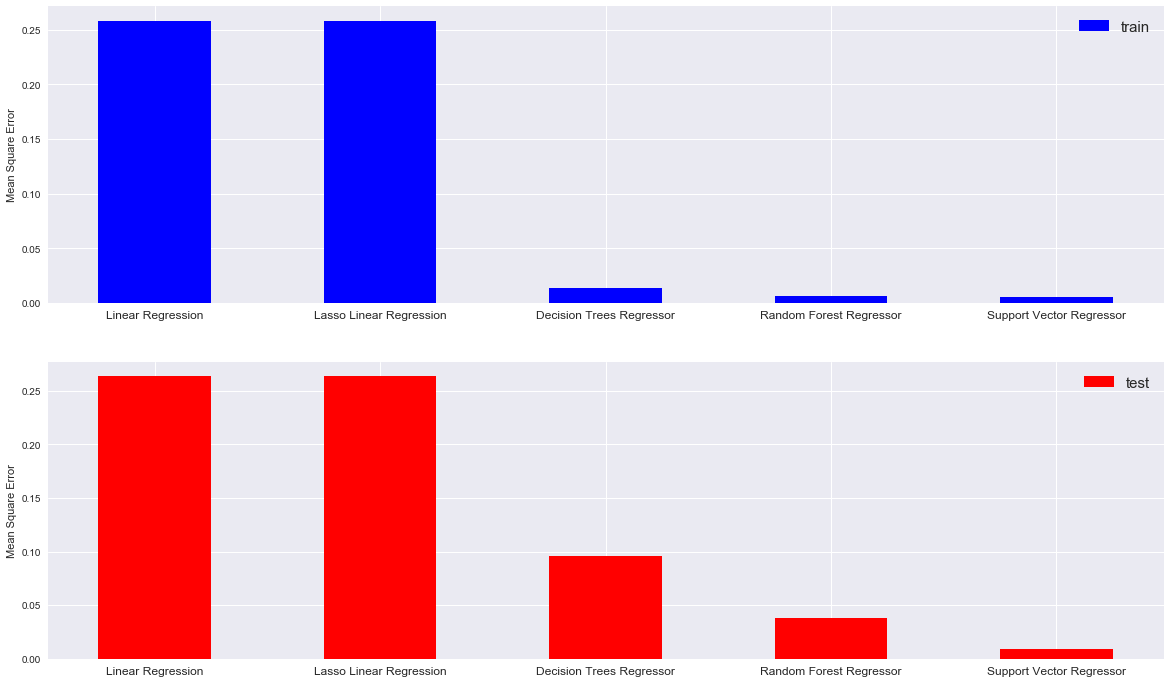

In [20]:
fig, ax = plt.subplots(2,1, figsize=(20,12))
x = range(5)
labels=list(model_residuals.keys())
labels.insert(0,' ') # trick to fix problem with labels in the x-axis

ax[0].bar(x,error_train_list, width=0.5, color="blue",label="train")
ax[0].set_ylabel("Mean Square Error")
ax[0].legend(prop={'size':15})
ax[0].set_xticklabels(labels,fontsize=12)

ax[1].bar(x,error_test_list, width=0.5, color="red",label="test",align='center')
ax[1].set_xticklabels(labels,fontsize=12)
ax[1].set_ylabel("Mean Square Error")
ax[1].legend(prop={'size':15})
plt.show()

From these results, we observe that the Linear models appear to have significantly larger prediction errors. Decision Trees work better, but there is considerable overfitting. Random Forests seem to mitigate this problem and imporve prediction capabilities with a lower error on both training and test set. The best working model is Support Vector Regression which achieved the lowest prediction error on test set. This can be justified to the flexibility of this model (using the rbf kernel), making it capable of approximatign complicated non-linear functions.

##### Residual Boxplot

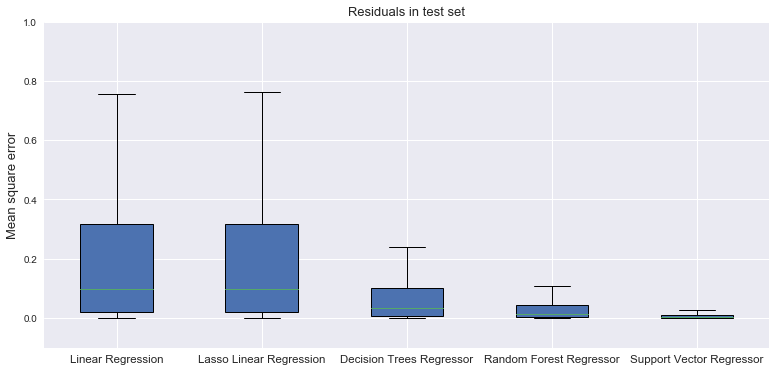

In [23]:
fig = plt.figure(1, figsize=(13, 6))
ax = fig.add_subplot(111)
labels=list(model_residuals.keys())
data_boxplot = list(model_residuals.values())
bp = ax.boxplot(data_boxplot,patch_artist=True)
ax.set_ylim(-0.1,1)
ax.set_xticklabels(labels,fontsize=11.5)
ax.set_title("Residuals in test set",fontsize=13)
ax.set_ylabel("Mean square error",fontsize=13)
plt.show()

The above figure present the residuals boxplot in the test for each model, which also confirms our conclusions regarding the applied models.